During DV phase JYH battery characterization, one of the batteries (device 1) starts acting wierd. Its discharge profile significantly shorten.

Load all discharge data for device 1 and device 2, Sort them by date and plot the overlay graph to seek when it went south, and what data are usable or not

File dataset/DV_phase/device2/linear/discharge.linear.15_deg.csv not found in test_sequnece


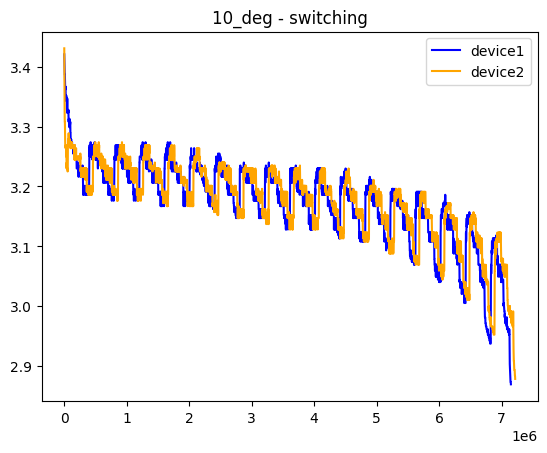

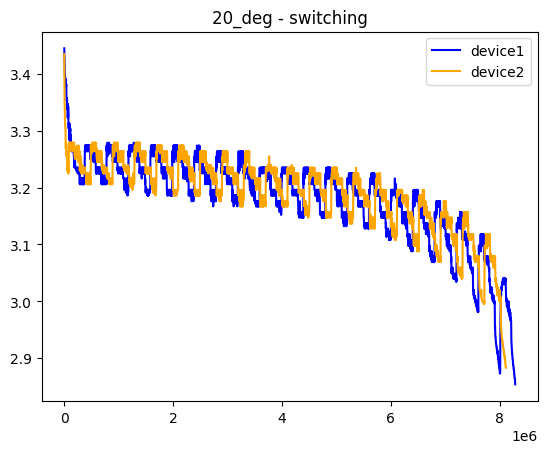

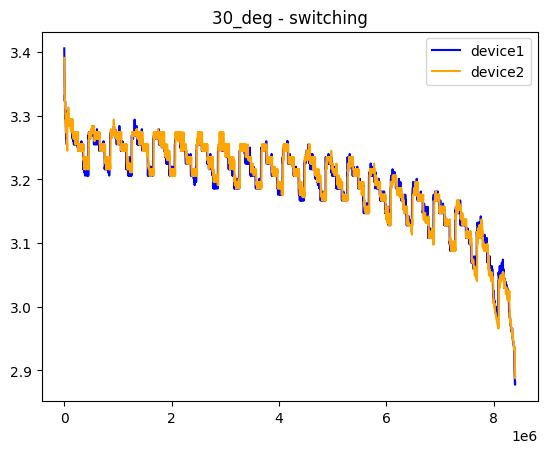

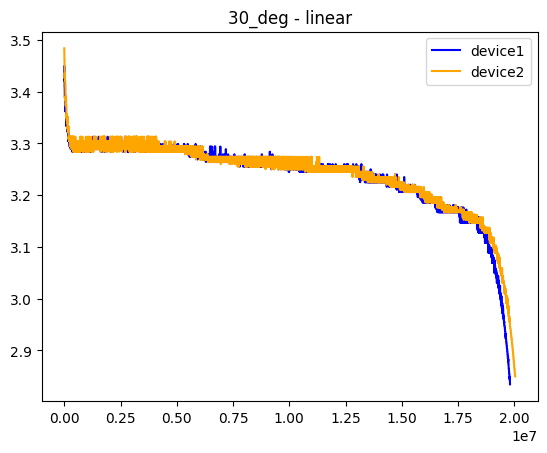

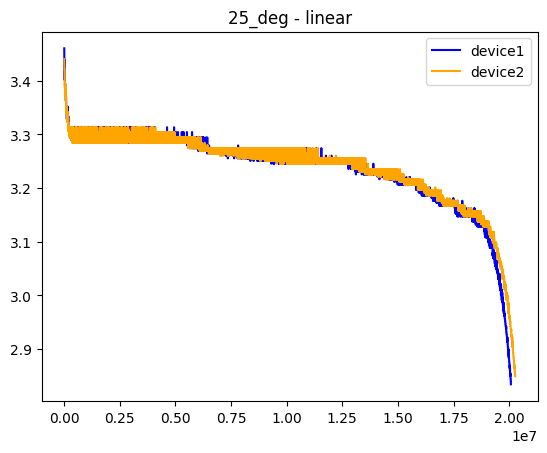

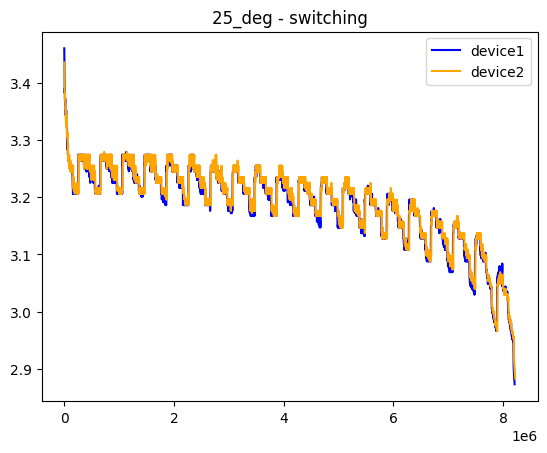

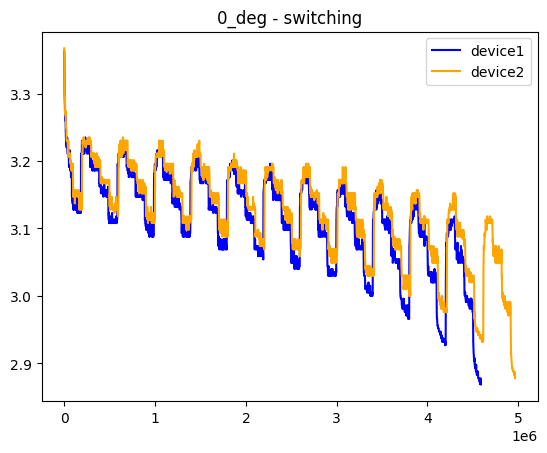

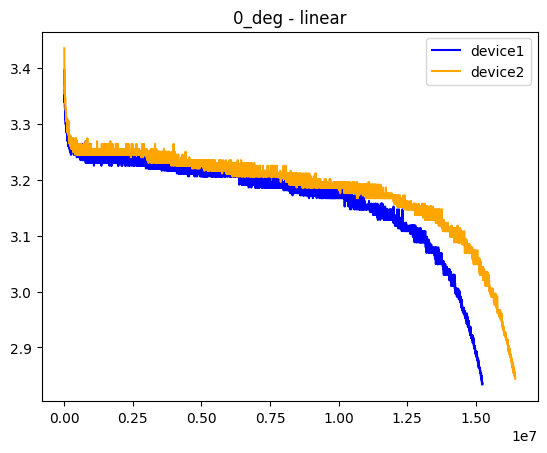

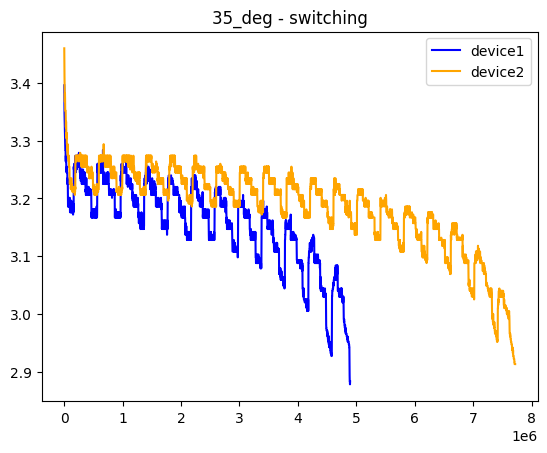

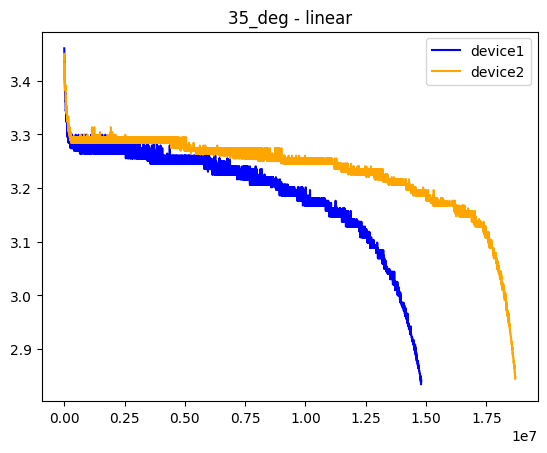

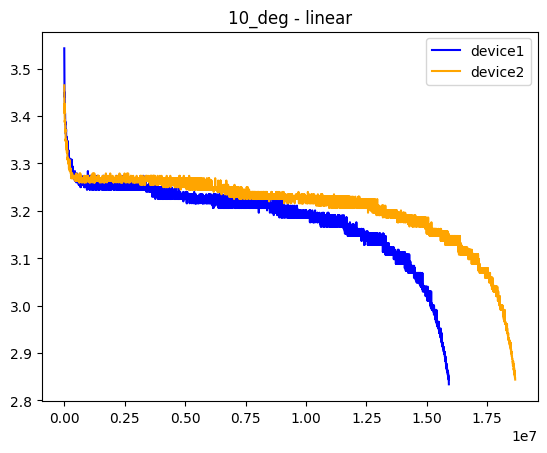

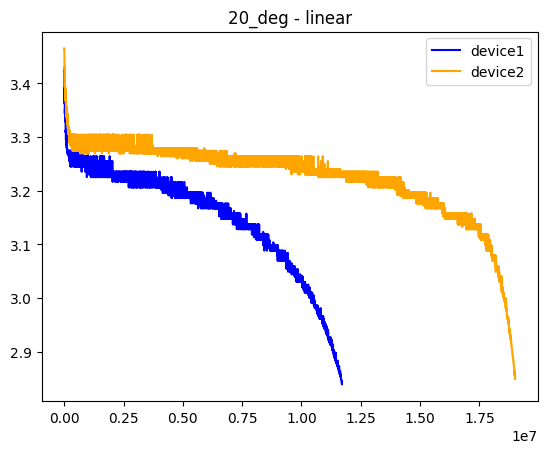

In [1]:
import matplotlib.pyplot as plt
import os
from fuel_gauge.profile_data_utils import *
from fuel_gauge.battery_profiling import *

def sort_map(file: Path):

    # Sequence how the test were performed in time.
    test_sequence = ["switching.10_deg", "switching.20_deg", "switching.30_deg", "linear.30_deg", "linear.25_deg", "switching.25_deg", 
                    "switching.0_deg", "linear.0_deg", "switching.35_deg", "linear.35_deg", "linear.10_deg", "linear.20_deg"]

    tc = file.stem.split(".")
    match_string = tc[1] + "." + tc[2] 

    for i, t in enumerate(test_sequence):
        if(match_string == t):
            return i

    print(f"File {file} not found in test_sequnece")

    return 100



device1_discharge_profiles = list(Path("dataset/DV_phase/device1").rglob("discharge.*.csv"))
device2_discharge_profiles = list(Path("dataset/DV_phase/device2").rglob("discharge.*.csv"))

device1_discharge_profiles.sort(key=sort_map)
device2_discharge_profiles.sort(key=sort_map)


for w in device1_discharge_profiles:

    # Extract test characteristics
    tc = w.stem.split(".")

    fig, ax = plt.subplots()
    discharge_profile = load_measured_data(w)
    ax.plot(discharge_profile.time, discharge_profile.vbat, color="blue", label="device1")

    # Extract temp
    test_type = tc[1]
    temp = tc[2]
    ax.set_title(f'{temp} - {test_type}')
    
    # Browse complementary device profiles
    for w_comp in device2_discharge_profiles:
        tc_comp = w_comp.stem.split(".")
        if(temp == tc_comp[2] and test_type == tc_comp[1]):
            discharge_profile_comp = load_measured_data(w_comp)    
            ax.plot(discharge_profile_comp.time, discharge_profile_comp.vbat, color="orange", label="device2")

    ax.legend()



Device 1 battery replaced for new one -> Label changed to device 3.

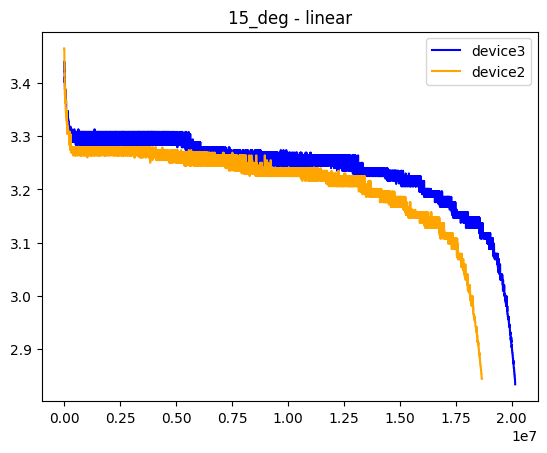

In [2]:
import matplotlib.pyplot as plt
import os
from fuel_gauge.profile_data_utils import *
from fuel_gauge.battery_profiling import *

def sort_map(file: Path):

    # Sequence how the test were performed in time.
    test_sequence = ["switching.10_deg", "switching.20_deg", "switching.30_deg", "linear.30_deg", "linear.25_deg", "switching.25_deg", 
                    "switching.0_deg", "linear.0_deg", "switching.35_deg", "linear.35_deg", "linear.10_deg", "linear.20_deg"]

    tc = file.stem.split(".")
    match_string = tc[1] + "." + tc[2] 

    for i, t in enumerate(test_sequence):
        if(match_string == t):
            return i

    print(f"File {file} not found in test_sequnece")

    return 100



device2_discharge_profiles = list(Path("dataset/DV_phase/device2").rglob("discharge.*.csv"))
device3_discharge_profiles = list(Path("dataset/DV_phase/device3").rglob("discharge.*.csv"))

for w in device3_discharge_profiles:

    # Extract test characteristics
    tc = w.stem.split(".")

    fig, ax = plt.subplots()
    discharge_profile = load_measured_data(w)
    ax.plot(discharge_profile.time, discharge_profile.vbat, color="blue", label="device3")

    # Extract temp
    test_type = tc[1]
    temp = tc[2]
    ax.set_title(f'{temp} - {test_type}')
    
    # Browse complementary device profiles
    for w_comp in device2_discharge_profiles:
        tc_comp = w_comp.stem.split(".")
        if(temp == tc_comp[2] and test_type == tc_comp[1]):
            discharge_profile_comp = load_measured_data(w_comp)    
            ax.plot(discharge_profile_comp.time, discharge_profile_comp.vbat, color="orange", label="device2")

    ax.legend()



Torturing Data

discharge.linear.0_deg_tor1	 total_capacity: 232.17mAh 	 discharge_time: 116.92 minutes
discharge.linear.0_deg_tor1_2	 total_capacity: 239.59mAh 	 discharge_time: 121.41 minutes
discharge.linear.0_deg_tor4	 total_capacity: 181.54mAh 	 discharge_time: 92.58 minutes
discharge.linear.0_deg_tor4_2	 total_capacity: 205.12mAh 	 discharge_time: 105.26 minutes


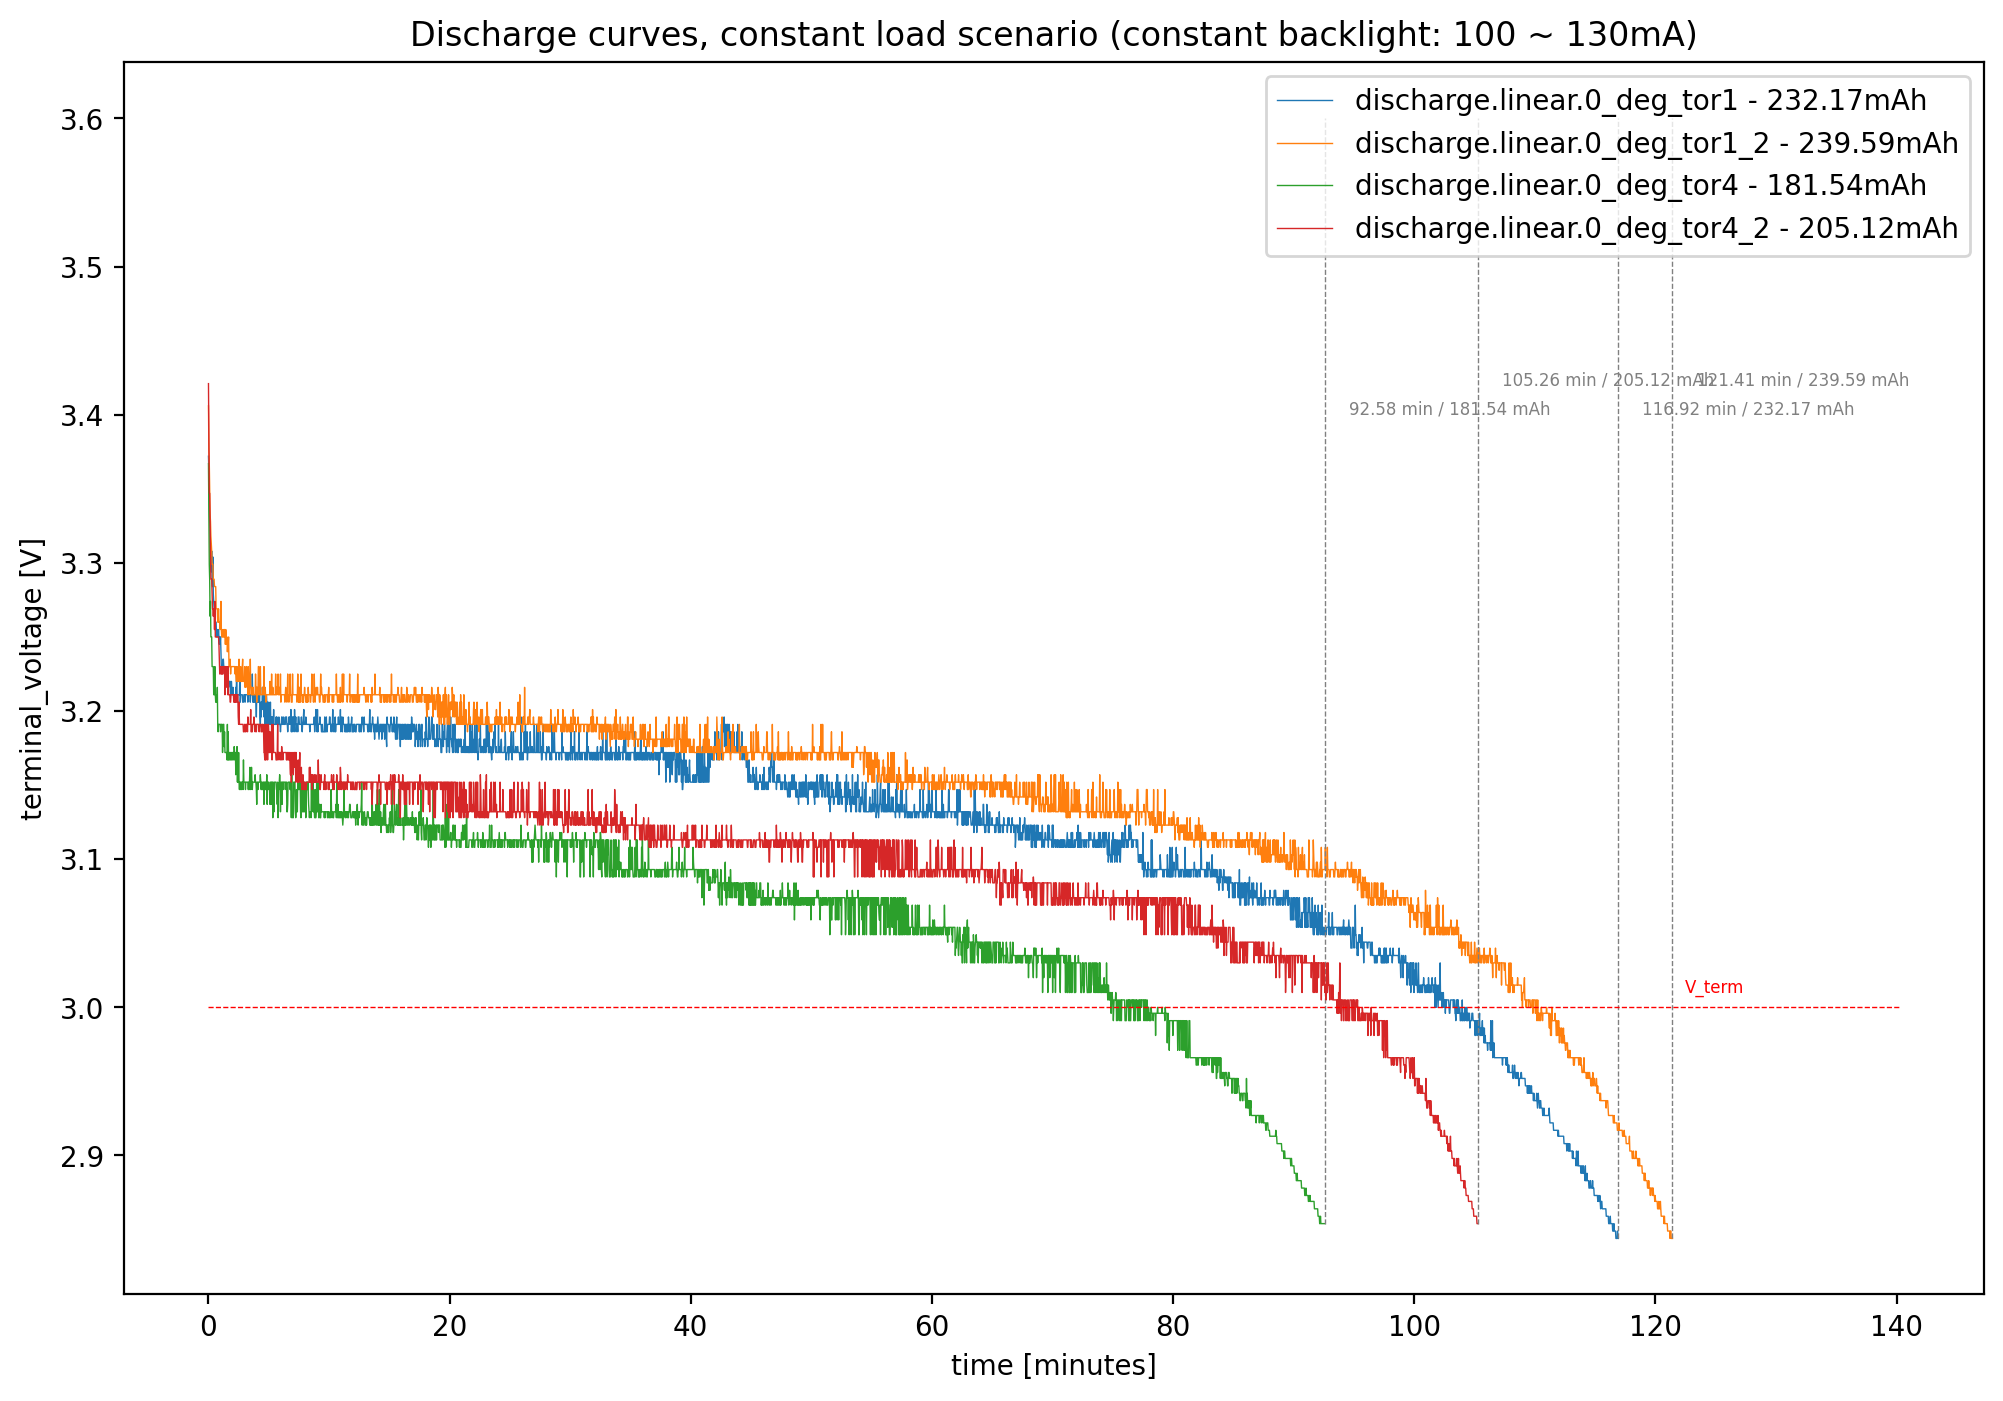

In [3]:
# Load linear discharge profiles from dataset

dataset_path = Path("dataset/torturing_test")
discharge_curves = dataset_path.rglob("discharge.linear.*.csv")

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.set_dpi(200)

for i, crv_path in enumerate(sorted(discharge_curves)):

    data = load_measured_data(crv_path)

    # Calcultate accumulated charge
    total_charge_mAh = coulomb_counter(data.time, data.ibat)

    time_min = time_to_minutes(data.time)
    ax.plot(time_min, data.vbat, label=f"{crv_path.stem} - {total_charge_mAh:.2f}mAh", linewidth=0.5)
    ax.vlines(x=time_min[-1], ymin=min(data.vbat), ymax=3.6, color='gray', linestyle='--', linewidth=0.5)
    ax.text(x=time_min[-1]+2, y=3.4+(0.02*(i%2)), s=f"{time_min[-1]:.2f} min / {total_charge_mAh:.2f} mAh", fontsize=6, color="gray")
    print(f"{crv_path.stem}\t total_capacity: {total_charge_mAh:.2f}mAh \t discharge_time: {time_min[-1]:.2f} minutes")

ax.set
left, right = ax.get_xlim()
ax.hlines(y=3.0, xmin=0, xmax=right*1.1, color='r', linestyle='--', linewidth=0.5)
ax.text(x=right-5, y=3.01, s=f"V_term", fontsize=6, color="red")
ax.set_xlabel("time [minutes]")
ax.set_ylabel("terminal_voltage [V]")
ax.set_title("Discharge curves, constant load scenario (constant backlight: 100 ~ 130mA)")
ax.legend()

plt.show()

discharge.switching.0_deg_tor1_3	 total_capacity: 157.12mAh 	 discharge_time: 60.69 minutes
discharge.switching.0_deg_tor1_4	 total_capacity: 250.16mAh 	 discharge_time: 99.36 minutes
discharge.switching.0_deg_tor4_3	 total_capacity: 176.21mAh 	 discharge_time: 66.64 minutes
discharge.switching.0_deg_tor4_4	 total_capacity: 265.41mAh 	 discharge_time: 103.37 minutes


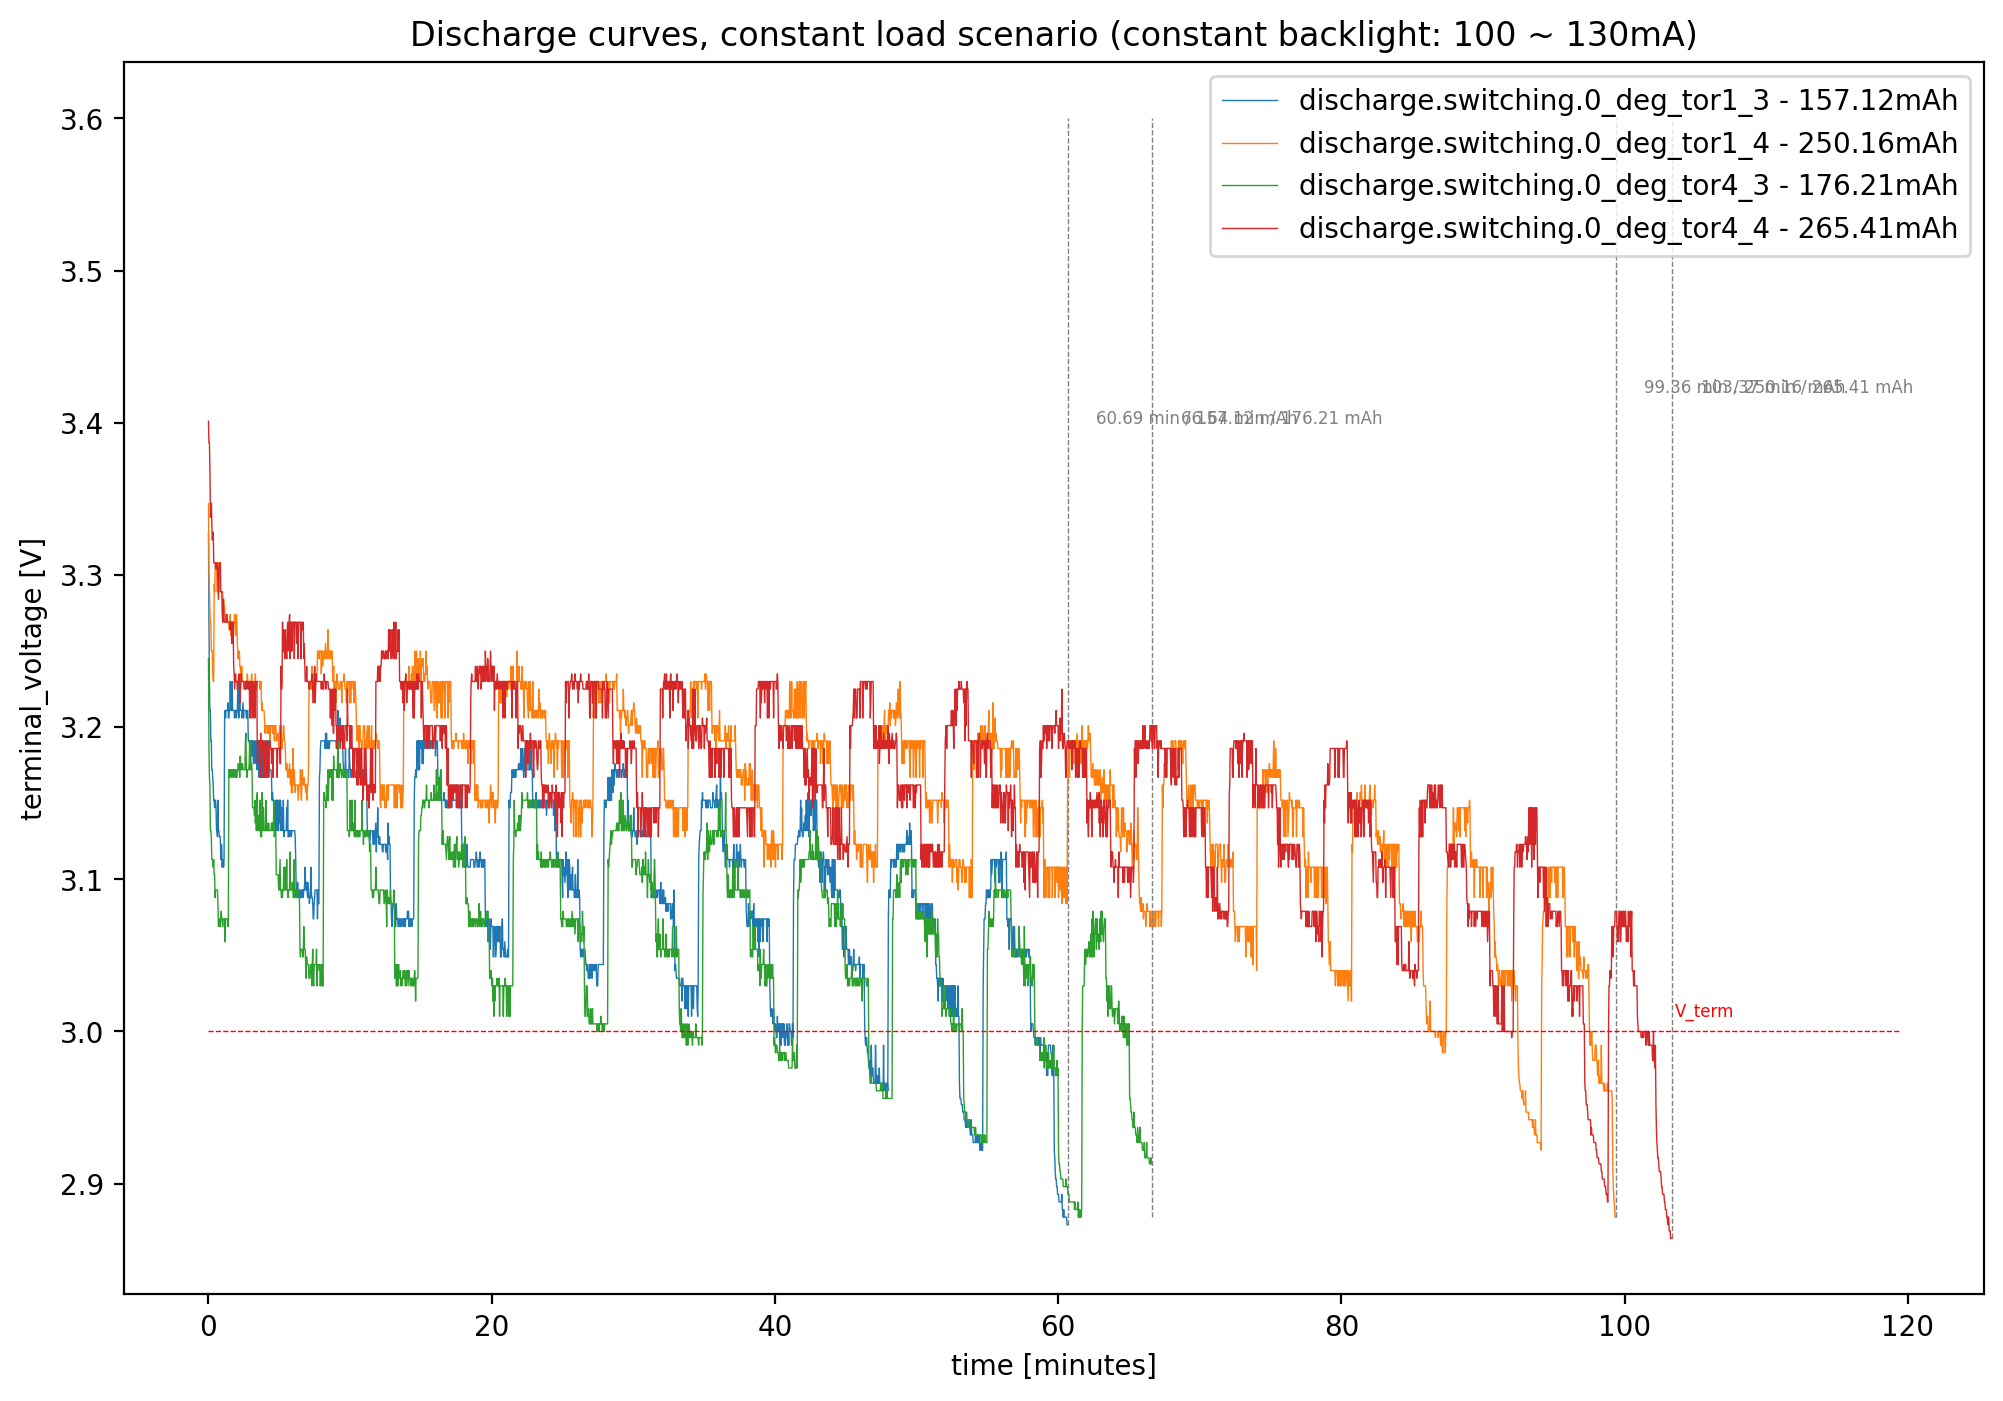

In [4]:

dataset_path = Path("dataset/torturing_test")
discharge_curves = dataset_path.rglob("discharge.switching.*.csv")

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.set_dpi(200)

for i, crv_path in enumerate(sorted(discharge_curves)):

    data = load_measured_data(crv_path)

    # Calcultate accumulated charge
    total_charge_mAh = coulomb_counter(data.time, data.ibat)

    time_min = time_to_minutes(data.time)
    ax.plot(time_min, data.vbat, label=f"{crv_path.stem} - {total_charge_mAh:.2f}mAh", linewidth=0.5)
    ax.vlines(x=time_min[-1], ymin=min(data.vbat), ymax=3.6, color='gray', linestyle='--', linewidth=0.5)
    ax.text(x=time_min[-1]+2, y=3.4+(0.02*(i%2)), s=f"{time_min[-1]:.2f} min / {total_charge_mAh:.2f} mAh", fontsize=6, color="gray")
    print(f"{crv_path.stem}\t total_capacity: {total_charge_mAh:.2f}mAh \t discharge_time: {time_min[-1]:.2f} minutes")

ax.set
left, right = ax.get_xlim()
ax.hlines(y=3.0, xmin=0, xmax=right*1.1, color='r', linestyle='--', linewidth=0.5)
ax.text(x=right-5, y=3.01, s=f"V_term", fontsize=6, color="red")
ax.set_xlabel("time [minutes]")
ax.set_ylabel("terminal_voltage [V]")
ax.set_title("Discharge curves, constant load scenario (constant backlight: 100 ~ 130mA)")
ax.legend()

plt.show()